<a href="https://colab.research.google.com/github/Shiva-kalyanaram/Resale-Price-Prediction/blob/main/house_rent_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/cleaned_house_rent')
df.head()

,day,month,year,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
0,21,4,2018,BHK2,Whitefield,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,CORP_BORE,AP,2.0,40000.0
1,10,9,2017,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0
2,6,12,2018,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0
3,20,7,2018,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0
4,31,5,2018,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0


In [ ]:
# 1. Correlation Analysis:
# - How does the number of bedrooms and bathrooms affect the rent price?
# - Is there a correlation between the property size and rent price?
# - Do properties with more amenities tend to have higher rent prices?

In [ ]:
# How does the number of bedrooms and bathrooms affect the rent price?

In [5]:
df['bathroom'].value_counts()

2.0     11298
1.0      6262
3.0      2646
4.0       287
5.0        33
6.0         3
21.0        1
7.0         1
Name: bathroom, dtype: int64

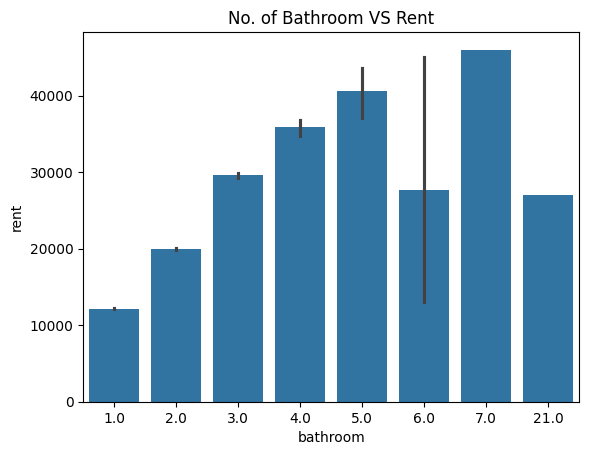

In [6]:
sns.barplot(x = 'bathroom', y = 'rent', data = df)
plt.title('No. of Bathroom VS Rent')
plt.show()

In [37]:
df['year'].value_counts()

2018    13073
2017     7458
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='rent'>

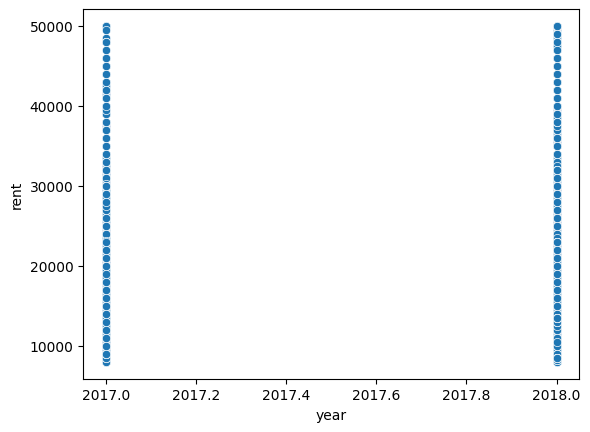

In [36]:
sns.scatterplot(x = 'year', y = 'rent', data=df)


In [ ]:
fig=px.bar(df,x="country",y="gdpPercap",color="lifeExp",hover_name="continent",animation_frame="year")
fig.show()

In [42]:
df['total_floor'].value_counts()

2.0     4857
4.0     4834
3.0     4668
1.0     2110
5.0     1491
0.0      363
14.0     240
12.0     214
6.0      212
9.0      207
11.0     197
10.0     195
8.0      183
13.0     171
7.0      168
15.0     124
19.0      70
16.0      65
18.0      53
17.0      37
20.0      25
21.0      18
23.0       9
24.0       7
25.0       5
22.0       4
26.0       4
Name: total_floor, dtype: int64

In [4]:
fig = px.bar(df, x = 'property_size', y = 'rent', color='balconies', hover_name='rent', animation_frame='total_floor')
fig.show()

This animation clearly shows as property size increase the rent price also increasing.

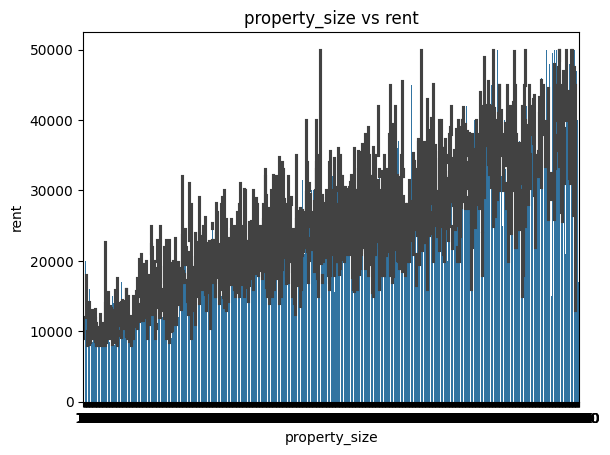

In [43]:
sns.barplot(x = 'property_size', y = 'rent', data=df)
plt.title('property_size vs rent')
plt.show()

In [8]:
df.columns

Index(['day', 'month', 'year', 'type', 'locality', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent'],
      dtype='object')

In [16]:
bulding_type = df.groupby('building_type')[['gym', 'lift', 'swimming_pool', 'rent']].mean().sort_values(by= 'rent', ascending =False)

In [24]:
bulding_type.reset_index()

,building_type,gym,lift,swimming_pool,rent
0,GC,0.235294,0.117647,0.352941,27852.941176
1,AP,0.497803,0.801127,0.388620,23372.620507
2,IH,0.039600,0.017090,0.033347,18297.977491
3,IF,0.015152,0.029654,0.005844,15091.503247


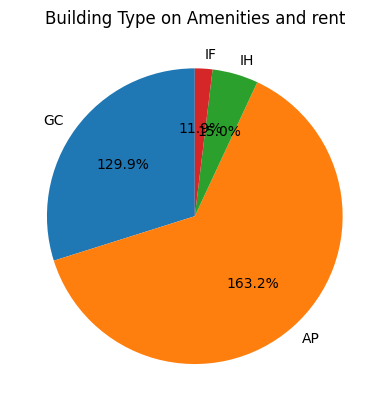

In [27]:
plt.pie(bulding_type.iloc[:,0], labels = bulding_type.index, autopct = '1%.1f%%', startangle = 90)
plt.title('Building Type on Amenities and rent')
plt.show()

It clearly shows that AP and GC wise building type had more amenities like Gym, Lift, etc and its rent price were higher while comparing to other types like Individual house.

In [7]:
df.head(2)

,day,month,year,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
0,21,4,2018,BHK2,Whitefield,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,CORP_BORE,AP,2.0,40000.0
1,10,9,2017,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0


**Lets see further factors which affects rental price like furnishing, parking, property age**

In [8]:
df['furnishing'].value_counts()

SEMI_FURNISHED     17926
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: furnishing, dtype: int64

<ipython-input-22-9d6eec1f4430>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




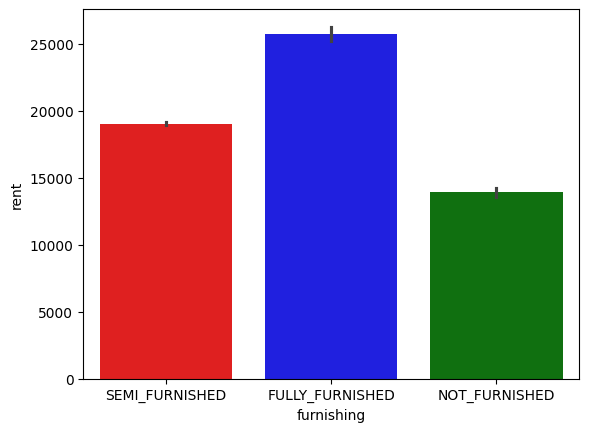

In [22]:
colors = ['red', 'blue', 'green']

bar = sns.barplot(x = 'furnishing', y = 'rent', data=df, palette = colors)
plt.show()


It clearly shows Fully furnished contributed high rent price while comparing to others.

In [27]:
parking = df.groupby('parking')['rent'].mean()
parking

parking
BOTH            22636.226760
FOUR_WHEELER    21484.883978
NONE            14972.456814
TWO_WHEELER     13792.379415
Name: rent, dtype: float64

<Axes: xlabel='parking', ylabel='rent'>

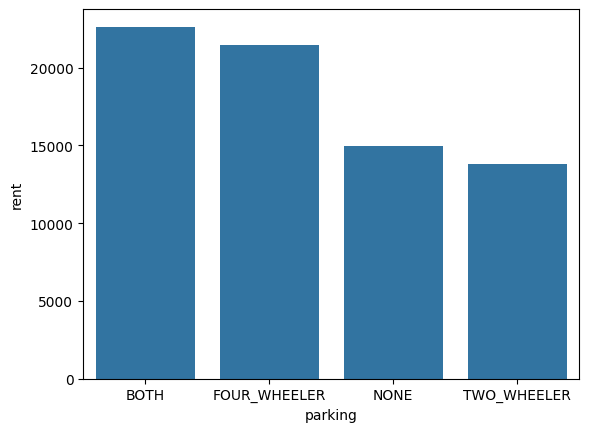

In [26]:
sns.barplot(x = parking.index, y = parking)

In [ ]:
df['property_age'].value_counts()

<Axes: xlabel='property_age', ylabel='rent'>

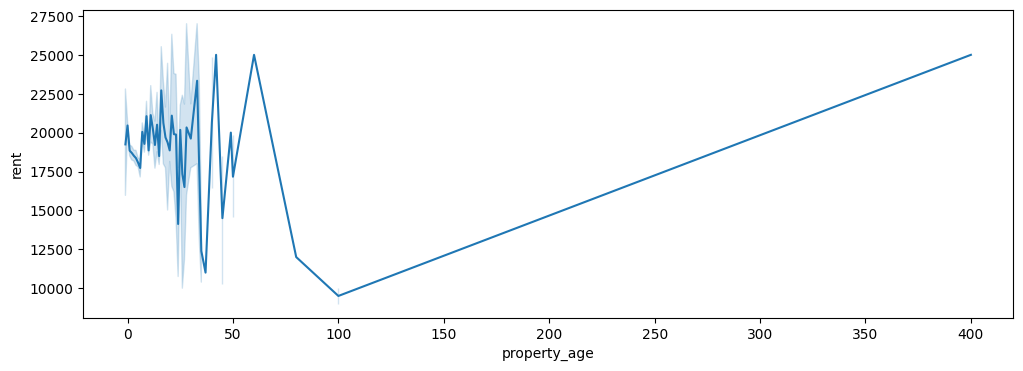

In [35]:

plt.figure(figsize=(12,4))
sns.lineplot(x= 'property_age', y = 'rent', data = df)

It clearly saying that the properties which getting old, had high rental price. That is approximately more than 100 age.

In [38]:
water = df.groupby('water_supply')['rent'].mean().sort_values(ascending=False)

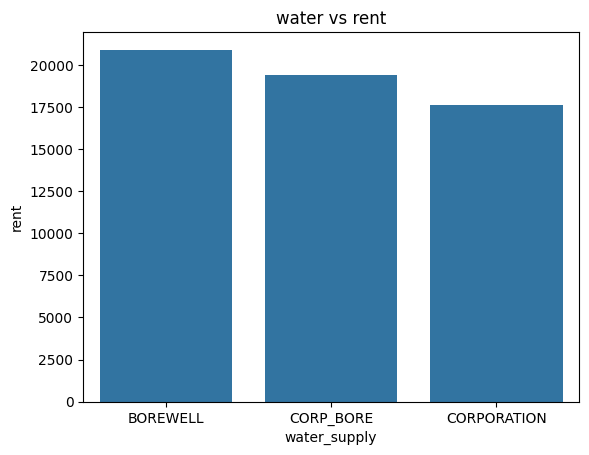

In [39]:
sns.barplot(x = water.index, y = water)
plt.title('water vs rent')
plt.show()

In [40]:
df.head(1)

,day,month,year,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
0,21,4,2018,BHK2,Whitefield,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,CORP_BORE,AP,2.0,40000.0


In [43]:
fig = px.sunburst(df,path=["type","lease_type"],values="rent")
fig.show()

**Lets move to the geospatial analysis and Direction wise rental difference**

In [44]:
df.head(2)

,day,month,year,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
0,21,4,2018,BHK2,Whitefield,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,CORP_BORE,AP,2.0,40000.0
1,10,9,2017,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0


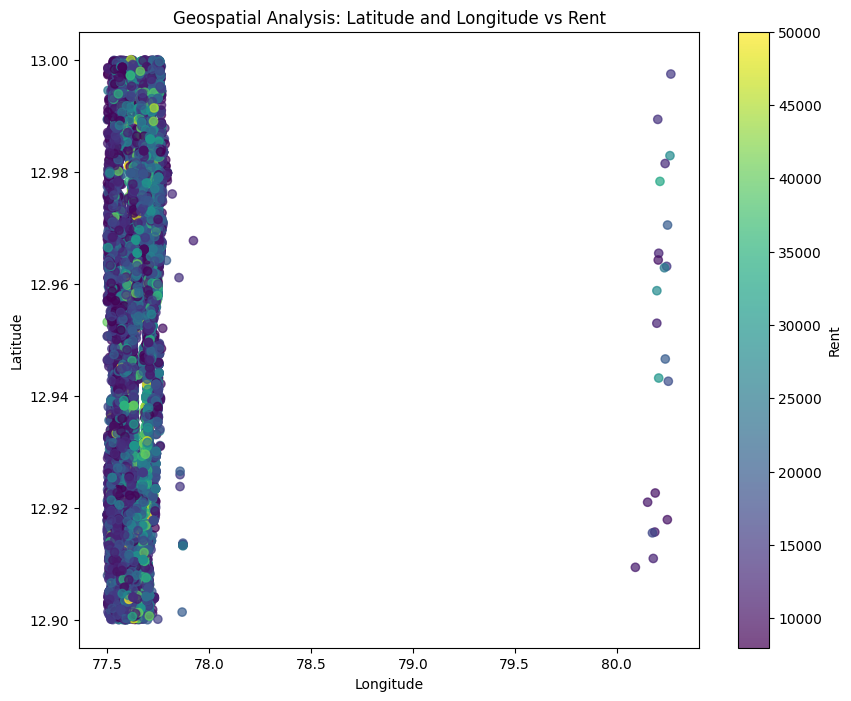

In [48]:
# Scatter plot with rental values represented by color
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['rent'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Rent')

plt.title('Geospatial Analysis: Latitude and Longitude vs Rent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<ipython-input-52-8e87eb02a7d0>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




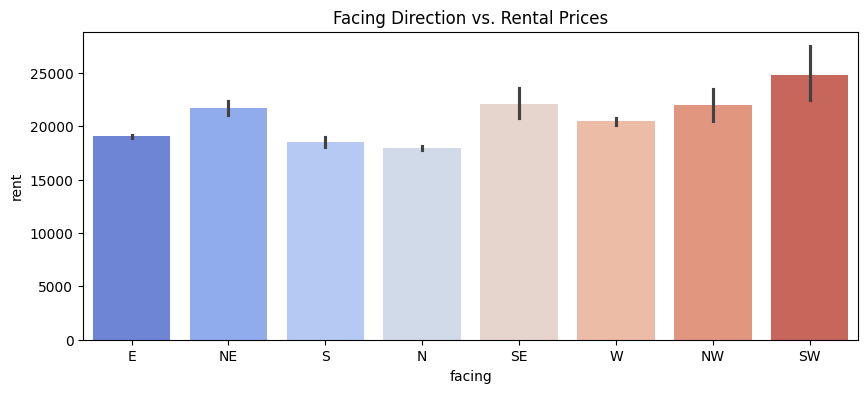

In [52]:
plt.figure(figsize=(10, 4))
bar = sns.barplot(x='facing', y='rent', data=df, palette='coolwarm')
plt.title('Facing Direction vs. Rental Prices')
plt.show()

In [53]:
df.groupby('facing')['rent'].mean().sort_values(ascending=False)

facing
SW    24813.559322
SE    22117.979695
NW    21949.664430
NE    21706.543452
W     20443.597644
E     19047.621211
S     18506.193601
N     17970.343460
Name: rent, dtype: float64

In [58]:
location = df.groupby('locality')[['facing', 'rent']].mean().sort_values(by='rent', ascending=False).head(10)
location.reset_index()

<ipython-input-58-68a218e01987>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,locality,rent
0,"Junnasandra, Bengaluru, Karnataka, India",50000.0
1,"Tasker Town,Shivaji Nagar",50000.0
2,"Krishvi Dhavala, Doddakannelli, Bellandur, Ben...",50000.0
3,"Chennammanakere Achukattu,",50000.0
4,"Devarabisanahalli, Bellandur",50000.0
5,"Outer Ring Road, Marathahalli, Bengaluru, Karn...",48000.0
6,JP Nagar Phase 1,48000.0
7,"Halanayakanahalli, Bengaluru, Karnataka, India",47500.0
8,"Sarjapur, Bengaluru, Karnataka 562125, India",46000.0
9,"Cauvery Colony,Koramangala",45000.0


<Axes: xlabel='locality', ylabel='rent'>

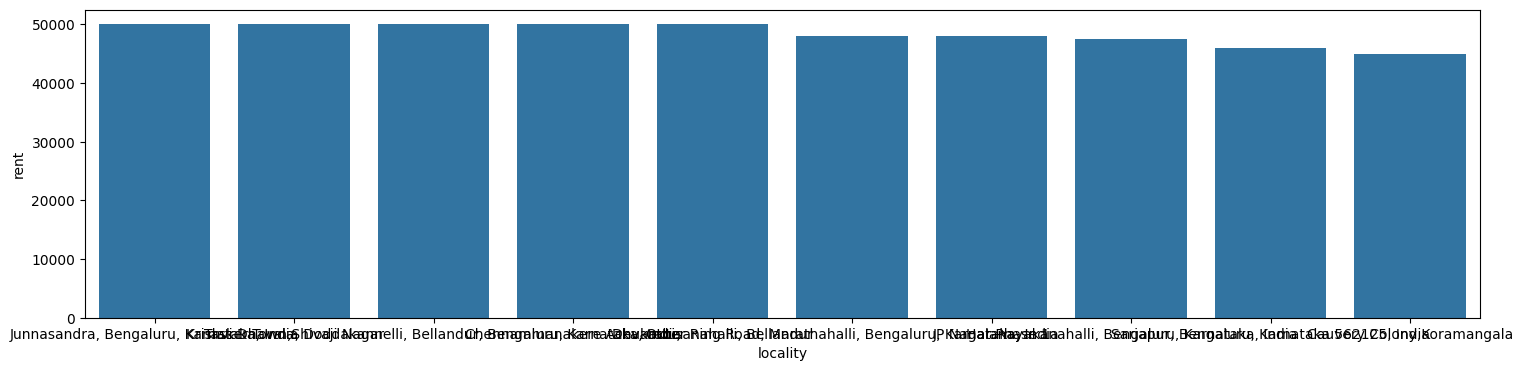

In [64]:
plt.figure(figsize=(18,4))
sns.barplot(x = 'locality', y = 'rent', data = location.reset_index() )